<center> <b> <h1> Mất Cân Bằng Dữ Liệu - Data Imbalance

**Mất cân bằng dữ liệu (Data Imbalance)** là tình trạng trong đó các lớp hoặc nhãn trong tập dữ liệu không được phân phối đều. Điều này có nghĩa là có sự chênh lệch đáng kể về số lượng mẫu giữa các lớp. Trong bối cảnh này, một hoặc vài lớp có số lượng mẫu ít hơn so với các lớp khác, gây ra sự mất cân bằng trong tập dữ liệu.

Trong trường hợp tỷ lệ dữ liệu giữa 2 lớp là `50:50` thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 lớp, chẳng hạn 60:40 thì dữ liệu có hiện tượng mất cân bằng.

- Lớp nhiều hơn: Lớp đa số (Majority Sample)
- Lớp ít hơn: Lớp thiếu số (Minority Sample)

Mất cân bằng dữ liệu thường gặp trong nhiều vấn đề khác nhau, ví dụ như phân loại gian lận tín dụng, phát hiện xâm nhập, phát hiện bệnh, phân loại văn bản, và nhiều ứng dụng học máy khác. Trong các tình huống này, mất cân bằng dữ liệu có thể gây ra các vấn đề như độ chính xác giảm, độ phủ kém, và sự thiên lệch trong việc huấn luyện mô hình.

**Oversampling:** Tạo thêm các mẫu từ lớp thiểu số bằng cách nhân bản, lặp lại hoặc tạo ngẫu nhiên các mẫu từ dữ liệu hiện có.
**Undersampling:** Loại bỏ một số mẫu từ lớp đông đảo để đạt được sự cân bằng hơn.

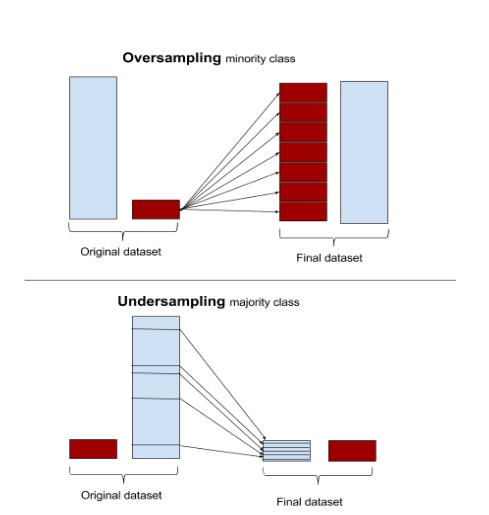


**Áp dụng kỹ thuật lớp thiểu số:** Sử dụng các kỹ thuật như SMOTE (Synthetic Minority Over-sampling Technique) để tạo ra các mẫu thiểu số nhân tạo.

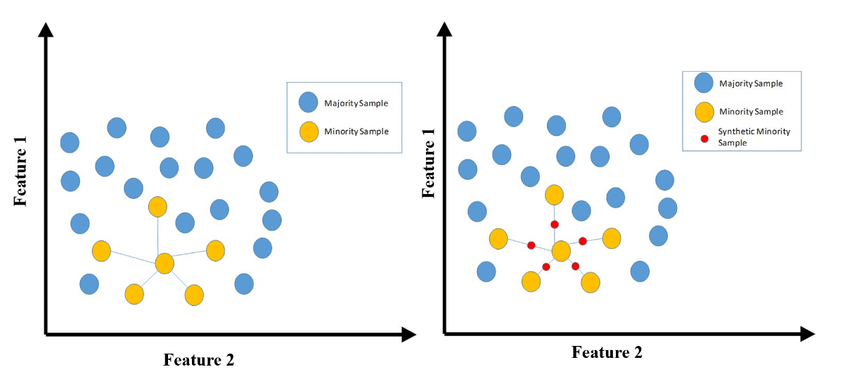

In [27]:
import pandas as pd
df = pd.read_csv('C:/Users/truon/OneDrive/Desktop/MindX_Lv3/Data/Bank_Customer_Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


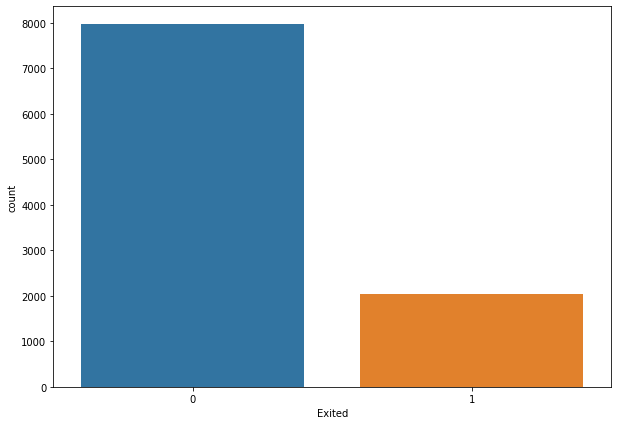

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.countplot(data = df, x = 'Exited')
plt.show()

In [30]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace = True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(8000, 10)
(2000, 10)


In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
def _tunning_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
    disp.plot()

    acc = round(accuracy_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    prec = round(precision_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    return acc, recall, prec, f1, classification_report(y_test, y_pred)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

<h3> Kết quả khi chưa xử lý mất cân bằng

Độ chính xác: 0.815
Recall: 0.1807
Precision: 0.5966
F1: 0.2773
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



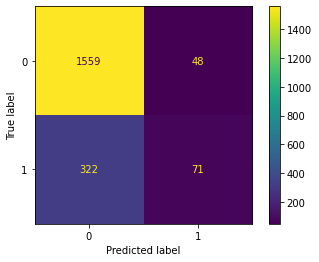

In [33]:
acc, recall, prec, f1, report = _tunning_model(lr, X_train, X_test, y_train, y_test)
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)

<h3> Xử lý mất cân bằng - SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X, y)
unique, counts = np.unique(y_SMOTE, return_counts=True)
print(dict(zip(unique, counts)))
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.2, random_state = 42)

{0: 7963, 1: 7963}


Độ chính xác: 0.7062
Recall: 0.7096
Precision: 0.6944
F1: 0.7019
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1633
           1       0.69      0.71      0.70      1553

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



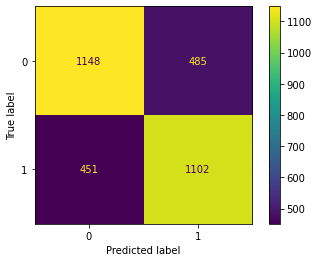

In [35]:
acc, recall, prec, f1, report = _tunning_model(lr, X_train, X_test, y_train, y_test)
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)

<h3> Xử lý mất cân bằng - Oversampling

In [36]:
from imblearn.over_sampling import RandomOverSampler
X_OverS, y_OverS = RandomOverSampler(random_state= 42).fit_resample(X, y)
unique, counts = np.unique(y_OverS, return_counts=True)
print(dict(zip(unique, counts)))
X_train, X_test, y_train, y_test = train_test_split(X_OverS, y_OverS, test_size = 0.2, random_state = 42)

{0: 7963, 1: 7963}


Độ chính xác: 0.689
Recall: 0.6819
Precision: 0.6806
F1: 0.6812
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1633
           1       0.68      0.68      0.68      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186



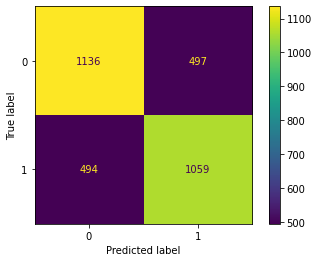

In [37]:
acc, recall, prec, f1, report = _tunning_model(lr, X_train, X_test, y_train, y_test)
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)

<h3> Xử lý mất cân bằng - Undersampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler
X_UnderS, y_UnderS = RandomUnderSampler(random_state= 42).fit_resample(X, y)
unique, counts = np.unique(y_UnderS, return_counts=True)
print(dict(zip(unique, counts)))
X_train, X_test, y_train, y_test = train_test_split(X_UnderS, y_UnderS, test_size = 0.2, random_state = 42)

{0: 2037, 1: 2037}


Độ chính xác: 0.692
Recall: 0.6882
Precision: 0.6547
F1: 0.671
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       443
           1       0.65      0.69      0.67       372

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815



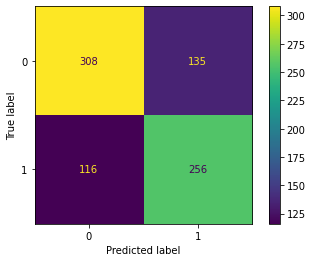

In [39]:
acc, recall, prec, f1, report = _tunning_model(lr, X_train, X_test, y_train, y_test)
print("Độ chính xác:", acc)
print("Recall:", recall)
print("Precision:", prec)
print("F1:", f1)
print(report)